# Exploring eBay Car Sales Data

The dataset was originally scraped and uploaded to Kaggle by user orgesleka.
The original dataset isn't available on Kaggle anymore, but you can find it here: https://data.world/data-society/used-cars-data. 

A few modifications have been made from the original dataset:

50,000 data points from the full dataset were sampled, to ensure code runs quickly.

The dataset was modified a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

The aim of this project is to clean the data and analyze the included used car listings.

In [1]:
# Import packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Import dataset as a pandas dataframe
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
# Glimpse at the autos dataframe
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Cleaning Column Names

In [5]:
# Inspect the column names of the data frame
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
# Rename column names
autos.rename({'yearOfRegistration':'registration_year', 'monthOfRegistration':'registration_month', 
              'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 
              'dateCrawled':'date_crawled', 'offerType':'offer_type', 
              'vehicleType':'vehicle_type','powerPS':'power_ps', 'fuelType':'fuel_type',
              'nrOfPictures': 'nr_of_pictures', 'postalCode':'postal_code', 'lastSeen':'last_seen',
             'odometer':'odometer_km'}, 
             axis=1, inplace=True)

# Check if renaming worked
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

## Initial Exploration and Cleaning

In [7]:
autos.describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [8]:
# Convert 'price' column values from text into integer type
autos['price']=autos['price'].str.replace('$', '')
autos['price']=autos['price'].str.replace(',', '')
autos['price']=autos['price'].astype(int)

In [9]:
# Drop any columns that have mostly one type of value
# since it doesn't provide very useful info

print('nr_of_pictures:\n',autos['nr_of_pictures'].value_counts())

print('\nseller:\n', autos['seller'].value_counts())

print('\noffer_type:\n', autos['offer_type'].value_counts())

autos = autos.drop(['nr_of_pictures', 'seller', 'offer_type'], axis=1)

nr_of_pictures:
 0    50000
Name: nr_of_pictures, dtype: int64

seller:
 privat        49999
gewerblich        1
Name: seller, dtype: int64

offer_type:
 Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


In [10]:
# Convert 'odometer_km' column values from text into integer types
autos['odometer_km'] = autos['odometer_km']
autos['odometer_km'] = autos['odometer_km'].str.replace('km', '')
autos['odometer_km'] = autos['odometer_km'].str.replace(',', '')
autos['odometer_km'] = autos['odometer_km'].astype(int)

In [11]:
# Sanity check
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price               50000 non-null  int64 
 3   abtest              50000 non-null  object
 4   vehicle_type        44905 non-null  object
 5   registration_year   50000 non-null  int64 
 6   gearbox             47320 non-null  object
 7   power_ps            50000 non-null  int64 
 8   model               47242 non-null  object
 9   odometer_km         50000 non-null  int64 
 10  registration_month  50000 non-null  int64 
 11  fuel_type           45518 non-null  object
 12  brand               50000 non-null  object
 13  unrepaired_damage   40171 non-null  object
 14  ad_created          50000 non-null  object
 15  postal_code         50000 non-null  int64 
 16  last_seen           50

## Exploring the odometer and price columns

In [12]:
# Exploring the odometer_km column values

## How many unique values
print('Number of unique values:',autos['odometer_km'].unique().shape[0])

## Min/max/median/mean values
print('\nOdometer column summary:')
print(autos['odometer_km'].describe())


## Counter for each type of unique value, sort from highest to lowest counts
print('\nValue Counts:',autos['odometer_km'].value_counts().sort_index(ascending=False))

# No outliers

Number of unique values: 13

Odometer column summary:
count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Value Counts: 150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64


In [13]:
# Exploring the price_km column values

## How many unique values
print('Number of unique values:',autos['price'].unique().shape[0])

## Min/max/median/mean values
print('\nPrice column summary:')
print(autos['price'].describe())

## Counter for each type of unique value, sort from highest to lowest counts
auto_prices_sorted = autos['price'].value_counts().sort_index(ascending=False)
print('\nTop 10 highest car prices:')
print(auto_prices_sorted.head(10))

print('\nTop 50 lowest car prices:')
print(auto_prices_sorted.tail(10))

Number of unique values: 2357

Price column summary:
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

Top 10 highest car prices:
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

Top 50 lowest car prices:
12       3
11       2
10       7
9        1
8        1
5        2
3        1
2        3
1      156
0     1421
Name: price, dtype: int64


In [14]:
'''
There are outliers in pricing. 
Outlier being defined as above => 500000 and < 1
'''

# Remove rows with outlier car prices
# Outlier car prices defined as $0 and above $350'000
# Outliers defined by min and max
bool_series = autos['price'].between(1, 350000, inclusive=True)
autos = autos[bool_series]

In [15]:
# Sanity check

## Counter for each type of unique value, sort from highest to lowest counts
auto_prices_sorted = autos['price'].value_counts().sort_index(ascending=False)
print('New top 10 highest car prices:')
print(auto_prices_sorted.head(10))

print('\nNew top 50 lowest car prices:')
print(auto_prices_sorted.tail(10))

New top 10 highest car prices:
350000    1
345000    1
299000    1
295000    1
265000    1
259000    1
250000    1
220000    1
198000    1
197000    1
Name: price, dtype: int64

New top 50 lowest car prices:
13      2
12      3
11      2
10      7
9       1
8       1
5       2
3       1
2       3
1     156
Name: price, dtype: int64


## Exploring the date columns

In [16]:
'''
Inspect the date range the data covers

First convert the date into numerical data 
so that we can analyse it quantitatively
'''

# Select the first 5 rows, of columns containing dates
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [17]:
# Select the first 10 characters of the date_crawled column
autos['date_crawled'].str[:10]

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49995    2016-03-27
49996    2016-03-28
49997    2016-04-02
49998    2016-03-08
49999    2016-03-14
Name: date_crawled, Length: 48565, dtype: object

In [18]:
# Find the date range for each column containing dates
date_columns = ['date_crawled','ad_created','last_seen']
for i in date_columns:
    print('\n')
    date_counts = autos[i].value_counts(normalize=True, dropna=False)
    date_counts = date_counts.sort_index(ascending=True)
    print(i, "(Normalised):")
    print(date_counts)




date_crawled (Normalised):
2016-03-05 14:06:30    0.000021
2016-03-05 14:06:40    0.000021
2016-03-05 14:07:04    0.000021
2016-03-05 14:07:08    0.000021
2016-03-05 14:07:21    0.000021
                         ...   
2016-04-07 14:30:09    0.000021
2016-04-07 14:30:26    0.000021
2016-04-07 14:36:44    0.000021
2016-04-07 14:36:55    0.000021
2016-04-07 14:36:56    0.000021
Name: date_crawled, Length: 46882, dtype: float64


ad_created (Normalised):
2015-06-11 00:00:00    0.000021
2015-08-10 00:00:00    0.000021
2015-09-09 00:00:00    0.000021
2015-11-10 00:00:00    0.000021
2015-12-05 00:00:00    0.000021
                         ...   
2016-04-03 00:00:00    0.038855
2016-04-04 00:00:00    0.036858
2016-04-05 00:00:00    0.011819
2016-04-06 00:00:00    0.003253
2016-04-07 00:00:00    0.001256
Name: ad_created, Length: 76, dtype: float64


last_seen (Normalised):
2016-03-05 14:45:46    0.000021
2016-03-05 14:46:02    0.000021
2016-03-05 14:49:34    0.000021
2016-03-05 15:16:11    

The date ranges of 'date_crawled' and 'last_seen' spanned one month (between March and April). These dates were added by the crawler.
However, the date range of 'last_seen' spanned approx. 10 months. These dates were taken from the website. 

## Dealing with Incorrect Registration Year Data

In [19]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Analysis <br>

The registration_year column contains some odd values:<br>
The minimum value is 1000, before cars were invented <br>
The maximum value is 9999, many years into the future

A car can't be first registered after the listing was seen, any vehicle with a registration year after 2016 is definitely inaccurate. <br>

Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s. 

In [20]:
bool_series = autos['registration_year'].between(1900, 2016, inclusive=True)
autos_filtered = autos[bool_series]
autos_filtered.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000
mean,5977.716801,2002.910756,117.892933,125586.855466,5.827125,51097.434181
std,9177.909479,7.185103,184.922911,39852.528628,3.670300,25755.387192
min,1.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1250.000000,1999.000000,75.000000,100000.000000,3.000000,30827.000000
50%,3100.000000,2003.000000,109.000000,150000.000000,6.000000,49828.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,71732.000000
max,350000.000000,2016.000000,17700.000000,150000.000000,12.000000,99998.000000


In [21]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000
mean,5888.935591,2004.755421,117.197158,125770.101925,5.782251,50975.745207
std,9059.854754,88.643887,200.649618,39788.636804,3.685595,25746.968398
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


When the numbers of listings is removed when filtering out rows with incorrect registration dates, only <4% of the data is lost. Since data loss is minimal, removing rows with incorrect registration dates remains a conservative option. 

In [22]:
original_number_listings = 48565
filtered_number_listings = 46681
percentage_data_loss = (original_number_listings-filtered_number_listings)/(original_number_listings)
percentage_data_loss = round(percentage_data_loss*100, 2)
print('Date lost from filtering:', percentage_data_loss,'%')

Date lost from filtering: 3.88 %


In [24]:
# Exporting the cleaned dataset
autos_filtered.to_csv('cleaned_autos.csv')

## Exploring Price by Brand

In [25]:
autos_filtered['brand'].value_counts()

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

In [26]:
# Store all unique auto brands in the autos_filtered dataset
auto_brands = autos_filtered['brand'].value_counts().index
print(auto_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini',
       'mitsubishi', 'honda', 'kia', 'alfa_romeo', 'porsche', 'suzuki',
       'chevrolet', 'chrysler', 'dacia', 'daihatsu', 'jeep', 'subaru',
       'land_rover', 'saab', 'jaguar', 'daewoo', 'trabant', 'rover', 'lancia',
       'lada'],
      dtype='object')


In [27]:
# Mean auto price of each brand
mean_auto_price = {}
for i in auto_brands:
    # For each car (row) in autos_filtered, that matches the current iterator (i), 
    #extract its price and store it in the 'price' Series object
    prices= autos_filtered.loc[autos_filtered['brand']==i,'price']
    mean_price = prices.mean()
    mean_auto_price[i]=round(mean_price,2)

print(mean_auto_price)

{'volkswagen': 5402.41, 'bmw': 8332.82, 'opel': 2975.24, 'mercedes_benz': 8628.45, 'audi': 9336.69, 'ford': 3749.47, 'renault': 2474.86, 'peugeot': 3094.02, 'fiat': 2813.75, 'seat': 4397.23, 'skoda': 6368.0, 'nissan': 4743.4, 'mazda': 4112.6, 'smart': 3580.22, 'citroen': 3779.14, 'toyota': 5167.09, 'hyundai': 5365.25, 'sonstige_autos': 12338.55, 'volvo': 4946.5, 'mini': 10613.46, 'mitsubishi': 3394.57, 'honda': 4107.86, 'kia': 5982.33, 'alfa_romeo': 4087.69, 'porsche': 45643.94, 'suzuki': 4096.73, 'chevrolet': 6684.14, 'chrysler': 3465.74, 'dacia': 5915.53, 'daihatsu': 1636.2, 'jeep': 11650.5, 'subaru': 3953.29, 'land_rover': 19108.09, 'saab': 3211.65, 'jaguar': 11635.49, 'daewoo': 1049.0, 'trabant': 1790.86, 'rover': 1602.29, 'lancia': 3376.22, 'lada': 2688.3}


In [28]:
# Switch the key and value positions in mean_auto_price
# In other words, value becomes key, and key becomes value

switched_prices = {}

for i in mean_auto_price:
    switched_prices[mean_auto_price[i]]=i

    
# Sort prices according to increasing value
sorted_prices = sorted(list(switched_prices.keys()), reverse=False)


# Create new dictionary sorted according to increasing prices
sorted_mean_auto_prices = {}

for i in sorted_prices:
    sorted_mean_auto_prices[switched_prices[i]]=i
    
print(sorted_mean_auto_prices)

{'daewoo': 1049.0, 'rover': 1602.29, 'daihatsu': 1636.2, 'trabant': 1790.86, 'renault': 2474.86, 'lada': 2688.3, 'fiat': 2813.75, 'opel': 2975.24, 'peugeot': 3094.02, 'saab': 3211.65, 'lancia': 3376.22, 'mitsubishi': 3394.57, 'chrysler': 3465.74, 'smart': 3580.22, 'ford': 3749.47, 'citroen': 3779.14, 'subaru': 3953.29, 'alfa_romeo': 4087.69, 'suzuki': 4096.73, 'honda': 4107.86, 'mazda': 4112.6, 'seat': 4397.23, 'nissan': 4743.4, 'volvo': 4946.5, 'toyota': 5167.09, 'hyundai': 5365.25, 'volkswagen': 5402.41, 'dacia': 5915.53, 'kia': 5982.33, 'skoda': 6368.0, 'chevrolet': 6684.14, 'bmw': 8332.82, 'mercedes_benz': 8628.45, 'audi': 9336.69, 'mini': 10613.46, 'jaguar': 11635.49, 'jeep': 11650.5, 'sonstige_autos': 12338.55, 'land_rover': 19108.09, 'porsche': 45643.94}


Porsche is the most expensive used car, and Daewoo is the least expensive used car on average

## ANALYSIS: What is the most common brand/model combinations

In [29]:
most_common_combination = autos_filtered.groupby(['model', 'brand']).size().idxmax()

print(most_common_combination)

('golf', 'volkswagen')


## ANALYSIS: Is car price related to mileage?

In [30]:
# Create a dictionary wherein the keys are odometer readings (mileage) and the values are
# the corresponding average price

# Obtain unique odometer values
om_categories = autos_filtered['odometer_km'].unique()

# Create the dictionary
mileage_price = {}

# Aggregate the data according to the odometer values and output a corresponding average price
for i in om_categories:
    prices = autos_filtered.loc[autos_filtered['odometer_km'] == i, 'price']
    mean_price = prices.mean()
    mileage_price[i] = round(mean_price,2)

print(mileage_price)

{150000: 3767.93, 70000: 10927.18, 50000: 13812.17, 80000: 9721.95, 10000: 20550.87, 30000: 16608.84, 125000: 6214.02, 90000: 8465.03, 20000: 18448.48, 60000: 12385.0, 5000: 8873.52, 40000: 15499.57, 100000: 8132.7}


In [31]:
# Convert both mileage and price dictionaries to series objects
mileage = pd.Series(list(mileage_price.values()))

price = pd.Series(list(mileage_price.keys()))

# Create a dataframe from the mileage and price series objects
df = pd.DataFrame(mileage, columns=['mileage'])
df['price']=price

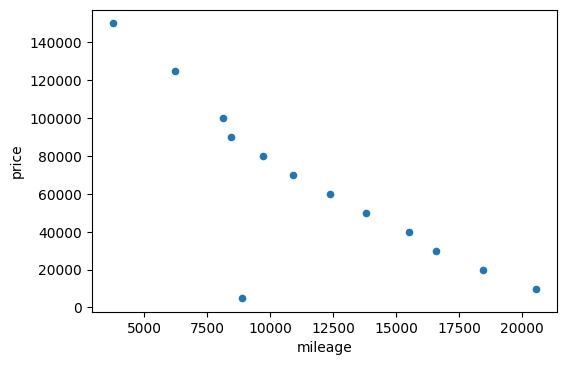

In [35]:
# Plot mileage vs price
%matplotlib inline
ax1 = df.plot.scatter(x='mileage', y='price')
plt.show()

Conclusion: There is a negative correlation between the average car price and the odometer reading (mileage) of the car. In other words, the higher the car mileage, the lesser amonut of money the car will be sold for. 

## ANALYSIS: How much cheaper are cars with damage than their non-damaged counterparts?

In [33]:
# Extract columns containing damage condition and price
damage_price = autos_filtered[['unrepaired_damage', 'price']]

# Translate unrepaired_damage values to English
changes = {'ja': 'yes', 'nein':'no'}
damage_price['unrepaired_damage'] = damage_price['unrepaired_damage'].map(changes)

# Aggregate data according to unrepaired_damage and calculate corresponding average price
damage_price = damage_price.groupby(by='unrepaired_damage').describe()

<ipython-input-33-be10c8361b3a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# Divide mean price of cars with damage vs cars with no damage
damage_price

#damage_price.iloc[0][2]/damage_price.iloc[1][2]

price                                                  \
                     count         mean           std  min     25%     50%   
unrepaired_damage                                                            
no                 33834.0  7164.033103  10078.475478  1.0  1800.0  4150.0   
yes                 4540.0  2241.146035   3563.276478  1.0   500.0  1000.0   

                                     
                      75%       max  
unrepaired_damage                    
no                 9000.0  350000.0  
yes                2500.0   44200.0

Conclusion: Cars with no damage sell 2.82x higher than cars with damage